### Prediksi Pembatalan Booking Hotel: Pencegahan dan Strategi Penanggulangannya

### **Konteks Proyek**:
Pembatalan pemesanan yang tidak terprediksi menjadi masalah besar bagi hotel, karena dapat menyebabkan sumber daya terbuang, beralihlnya ke kompetitor, dan pendapatan yang tidak stabil. Proyek ini bertujuan untuk memanfaatkan model prediksi pembatalan agar hotel dapat lebih siap menghadapinya, mengoptimalkan alokasi kamar, serta menawarkan harga dan layanan yang sesuai untuk meningkatkan kepuasan tamu dan mengurangi kerugian.

### **Rumusan Masalah**

Sebuah perusahaan hotel mengalami banyak kerugian akibat tingginya jumlah booking yang tidak pasti. Kondisi ini menimbulkan beberapa masalah serius, antara lain:

Divisi Operasional
- **Biaya operasional yang terbuang**  
    Pembatalan mendadak membuat biaya operasional terbuang sia-sia terutama bila kamar tidak sempat dijual kembali.

- **Slot kamar penuh dengan booking yang tak pasti**  
    Akibatnya, calon tamu yang benar-benar ingin menginap beralih ke kompetitor.

Divisi Keuangan  
- **Pendapatan sulit diprediksi**  
    Tingkat pembatalan yang tinggi menyebabkan estimasi revenue jadi tidak stabil.

Divisi Manajemen  
- **Kualitas data historis ikut terdampak**  
    Pembatalan yang tinggi bikin data pemesanan jadi kurang akurat untuk analisis tren permintaan di masa depan.

### **Tujuan Pengembangan Machine Learning**

- **Meningkatkan Akurasi Prediksi Pembatalan**  
    Mengembangkan model untuk memprediksi kemungkinan pembatalan dengan lebih tepat, agar hotel bisa mengambil langkah preventif.
    
- **Mengurangi Pembatalan dengan Meningkatkan Retensi Tamu**  
    Menggunakan hasil prediksi untuk mempertahankan tamu dengan pendekatan yang lebih proaktif, seperti fleksibilitas kebijakan atau insentif.
    
- **Optimalkan Alokasi Kamar dan Penjadwalan Staf**  
    Memanfaatkan prediksi untuk mengelola kamar dan tenaga kerja secara efisien, menghindari pemborosan sumber daya.
    
- **Meningkatkan Pendapatan lewat Penyesuaian Harga Berdasarkan Risiko**  
    Menyesuaikan harga kamar berdasarkan risiko pembatalan untuk menjaga pendapatan tetap stabil dan memaksimalkan pemanfaatan kamar.
    
- **Meningkatkan Kepuasan Pelanggan dan Loyalitas**  
    Memberikan pengalaman menginap yang lebih personal dan sesuai dengan preferensi tamu, meningkatkan kepuasan dan loyalitas.


### **Langkah Pemecahan Masalah**

Menganalisis data historis untuk mengenali ciri-ciri pemesanan yang cenderung dibatalkan, lalu membangun model prediktif guna mengidentifikasi tamu berisiko. Hasilnya digunakan sebagai acuan dalam pengambilan keputusan strategis.

#### **Metrik Evaluasi: Recall**

**Tujuan:**   
Menangkap sebanyak mungkin calon tamu yang sebenarnya berpotensi membatalkan pesanan (mengurangi jumlah false negative).

- **Keuntungan (Pros):**
    Memungkinkan tim untuk lebih proaktif dalam mengantisipasi pembatalan, misalnya dengan memberikan penawaran khusus atau follow-up kepada tamu yang berisiko tinggi membatalkan.

- **Kerugian (Cons):**
    Risiko memberikan promosi atau penawaran ke tamu yang sebenarnya tidak berniat membatalkan (false positive), sehingga strategi bisa menjadi tidak efisien atau bahkan dianggap mengganggu oleh tamu yang tidak bermasalah.


![My first board40..jpg](<attachment:My first board40..jpg>)
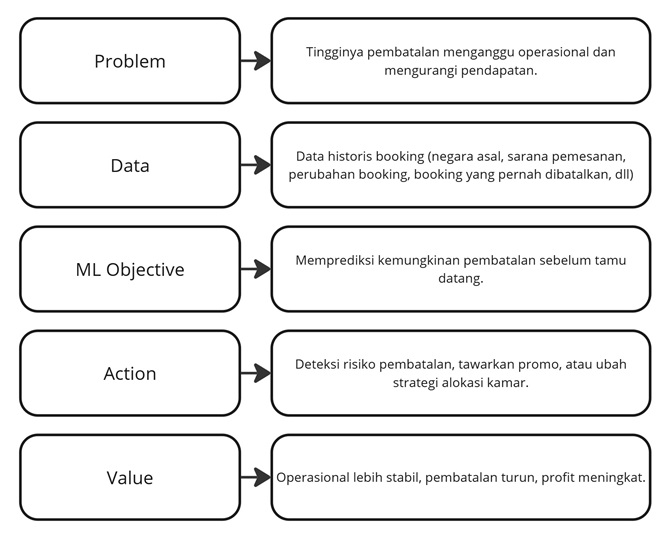

### Dataset: hotel booking

| Kolom                      | Deskripsi                                                                                      |
|---------------------------|-----------------------------------------------------------------------------------------------|
| `country`                 | Country of origin.                                                                            |
| `market_segment`          | Market segment designation.                                                                   |
| `previous_cancellations` | Number of previous bookings that were cancelled by the customer prior to the current booking. |
| `booking_changes`         | Number of changes/amendments made to the booking from entry to check-in or cancellation.      |
| `deposit_type`            | Indication on if the customer made a deposit to guarantee the booking.                        |
| `days_in_waiting_list`    | Number of days the booking was in the waiting list before confirmation.                       |
| `customer_type`           | Type of booking.                                                                               |
| `reserved_room_type`      | Code of room type reserved. Code used instead of designation for anonymity.                   |
| `required_car_parking_space` | Number of car parking spaces required by the customer.                                     |
| `total_of_special_request`   | Number of special requests made by the customer (e.g. twin bed or high floor).            |
| `is_canceled`             | Indicates if the booking was canceled (1) or not (0).                                         |


### Target : `is_canceled`
### Features : Seluruh kolom lainnya

Target prediksinya adalah `is_canceled` yang mewakili pembatalan booking 1 berarti batal, 0 berarti tidak batal.  
Pertama-tama kita akan mencoba train dengan seluruh kolom selain `is_canceled` sebagai fitur, nantinya fitur akan diatur ulang bila diperlukan.


In [1]:

# Basic
import numpy as np
import pandas as pd
import seaborn as sns

# Viz
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import category_encoders as ce


# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
import lightgbm as lgb
from scipy.stats import uniform, randint
from sklearn.model_selection import StratifiedKFold

# Metrics (Evaluasi Model)
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, mean_squared_error, r2_score
)

# Model selection
from sklearn.model_selection import cross_val_score, RandomizedSearchCV

# Warning
import warnings
warnings.filterwarnings('ignore')



### Import Data dan EDA

In [2]:
df = pd.read_csv(r'C:\Users\Hewlett Packard\Desktop\SAYA\Capstone 3\Hotel Booking Demand\data_hotel_booking_demand.csv')

In [3]:
df.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


#### Memeriksa Missing Value

In [5]:
df.isna().sum()

country                        351
market_segment                   0
previous_cancellations           0
booking_changes                  0
deposit_type                     0
days_in_waiting_list             0
customer_type                    0
reserved_room_type               0
required_car_parking_spaces      0
total_of_special_requests        0
is_canceled                      0
dtype: int64

Terlihat ada missing value pada kolom `country` nantinya missing value akan diisi oleh konstanta "unknown"

#### Dataset Summary

Categorical

In [6]:
df.describe(include="object")

,country,market_segment,deposit_type,customer_type,reserved_room_type
count,83222,83573,83573,83573,83573
unique,162,8,3,4,10
top,PRT,Online TA,No Deposit,Transient,A
freq,34097,39460,73352,62732,60041


"Kolom `country` memiliki 162 nilai unik, namun didominasi oleh negara PRT yang mencakup lebih dari sepertiga data, yaitu sebanyak 34.097 entri. Ketimpangan ini menunjukkan bahwa distribusi data tidak merata, sehingga diperlukan penyesuaian pada kolom ini untuk mengurangi potensi noise yang dapat mengganggu proses pelatihan model."

Numerical

In [7]:
df.describe(include="int")

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000
mean,0.086798,0.220897,2.330561,0.062999,0.573211,0.368277
std,0.841011,0.648635,17.673051,0.246919,0.795163,0.482340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


Terlihat adanya outlier pada seluruh kolom numerik kecuali `is_canceled`. Jika kita perhatikan nilai minimum dan quartile kolom-kolom ini bernilai 0 (kecuali q3 kolom `total_of_special_requests`) sedangkan nilai maksimumnya jauh dari 0. Outlier-outlier ini tidak akan dihapus karena diharapkan model machine learning dapat mempelajari perilaku tamu melalui data tersebut. Namun, akan dilakukan penyesuaian pada kolom-kolom terkait untuk mengurangi dampak ekstrem dari nilai-nilai tersebut.

Lebih jelasnya mari kita lihat value tiap kolom.

#### Cek Value Tiap Kolom

In [8]:
for i in df.columns:
    display(df[i].value_counts())
    

country
PRT    34097
GBR     8495
FRA     7307
ESP     5996
DEU     5116
       ...  
DMA        1
KIR        1
MYT        1
KNA        1
AIA        1
Name: count, Length: 162, dtype: int64

market_segment
Online TA        39460
Offline TA/TO    17025
Groups           13721
Direct            8898
Corporate         3792
Complementary      511
Aviation           165
Undefined            1
Name: count, dtype: int64

previous_cancellations
0     79060
1      4207
2        86
3        46
24       33
11       28
6        19
4        19
26       18
25       17
19       12
14       10
13       10
5         7
21        1
Name: count, dtype: int64

booking_changes
0     70873
1      8963
2      2652
3       639
4       260
5        90
6        39
7        23
8        10
10        5
9         4
13        4
17        2
12        2
14        2
16        2
21        1
20        1
15        1
Name: count, dtype: int64

deposit_type
No Deposit    73352
Non Refund    10111
Refundable      110
Name: count, dtype: int64

days_in_waiting_list
0      80988
39       166
58       104
44        93
31        93
       ...  
74         1
121        1
36         1
64         1
185        1
Name: count, Length: 115, dtype: int64

customer_type
Transient          62732
Transient-Party    17536
Contract            2882
Group                423
Name: count, dtype: int64

reserved_room_type
A    60041
D    13526
E     4649
F     2037
G     1447
B      787
C      673
H      401
P        9
L        3
Name: count, dtype: int64

required_car_parking_spaces
0    78346
1     5202
2       22
8        2
3        1
Name: count, dtype: int64

total_of_special_requests
0    49188
1    23214
2     9120
3     1784
4      236
5       31
Name: count, dtype: int64

is_canceled
0    52795
1    30778
Name: count, dtype: int64

Tidak terlihat ada missing value yang digantikan oleh konstanta.

### Visualisasi Penyebaran Data

#### `is_canceled`

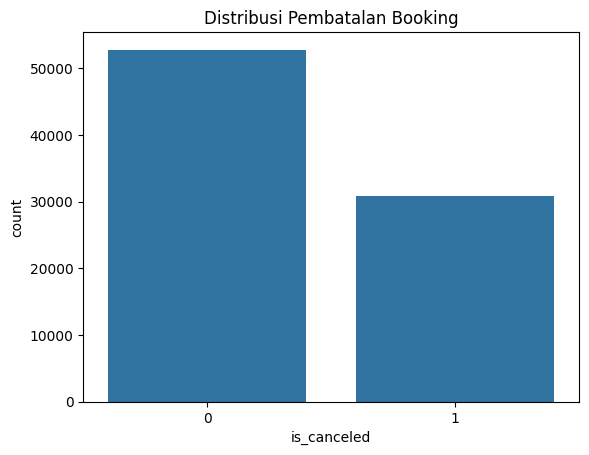

In [9]:
sns.countplot(x='is_canceled', data=df)
plt.title('Distribusi Pembatalan Booking')
plt.show()


### Penyebaran Data Kolom Kategorikal

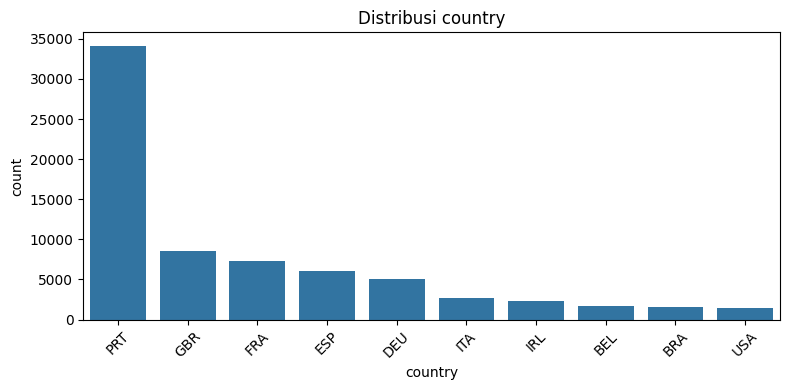

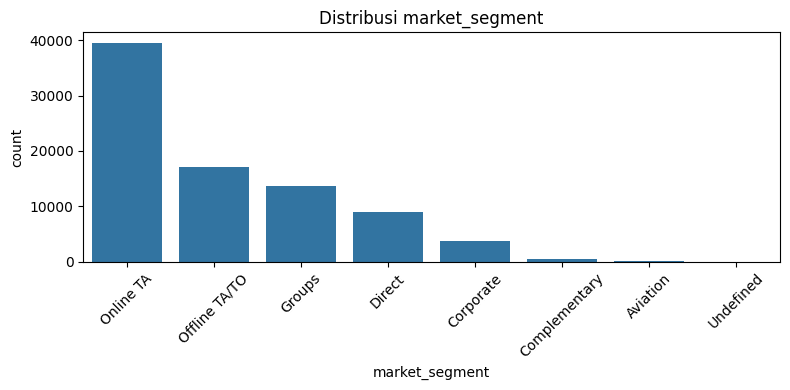

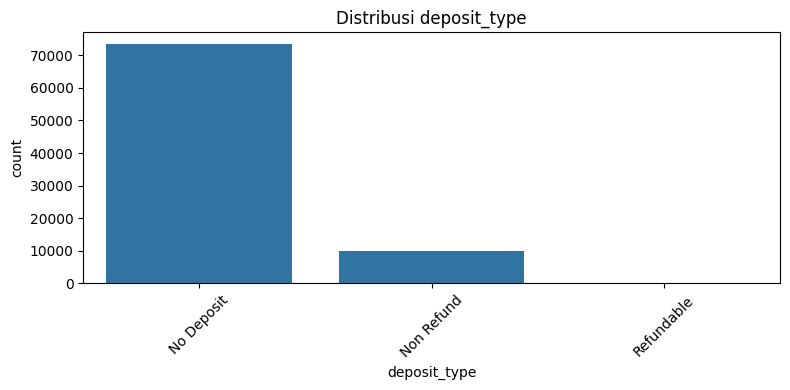

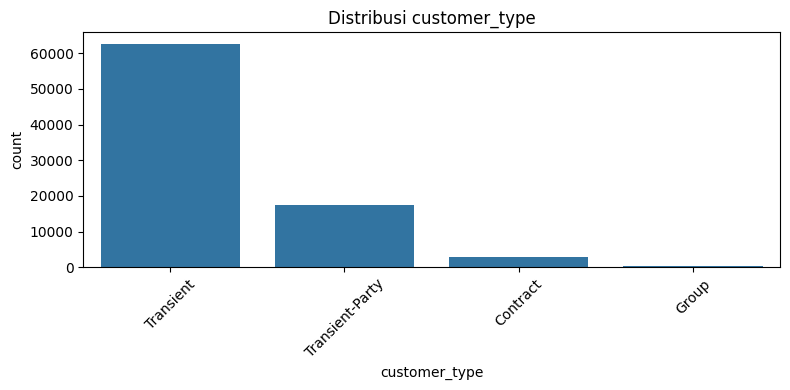

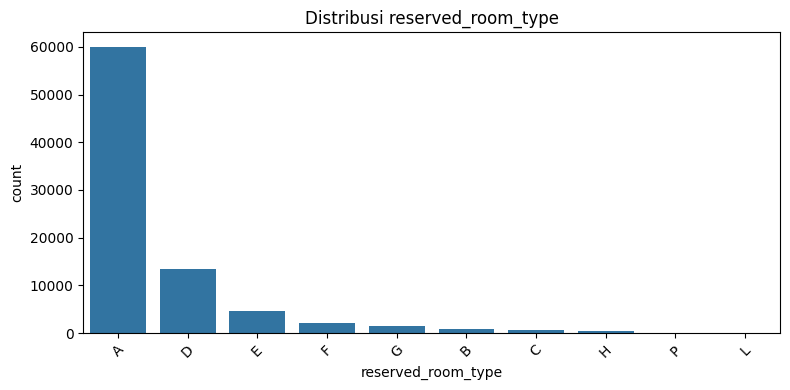

In [10]:
cat_cols = ['country', 'market_segment', 'deposit_type', 'customer_type', 'reserved_room_type']
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10])
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Penyebaran Data Kolom Numerikal

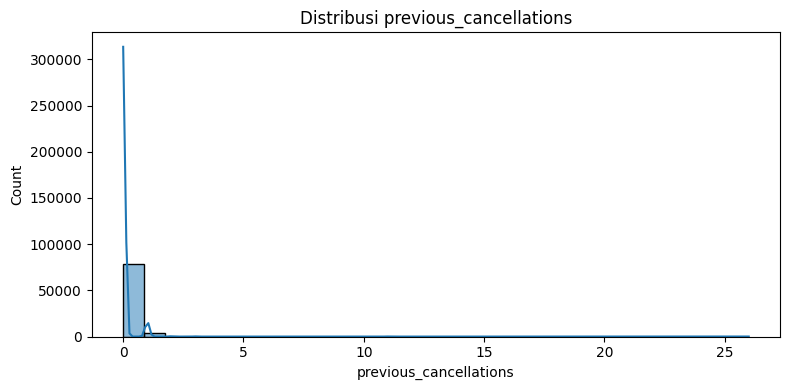

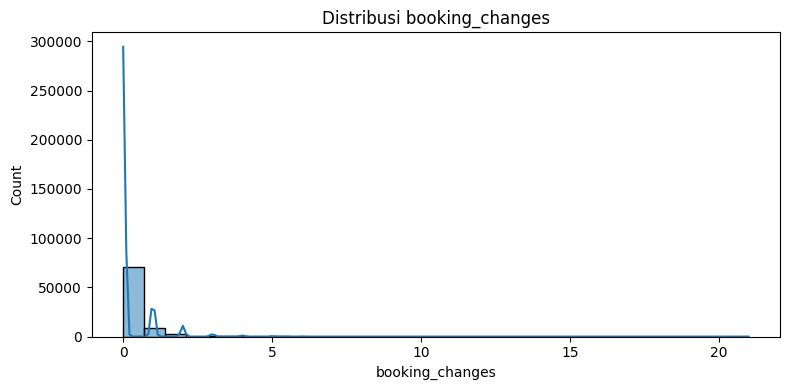

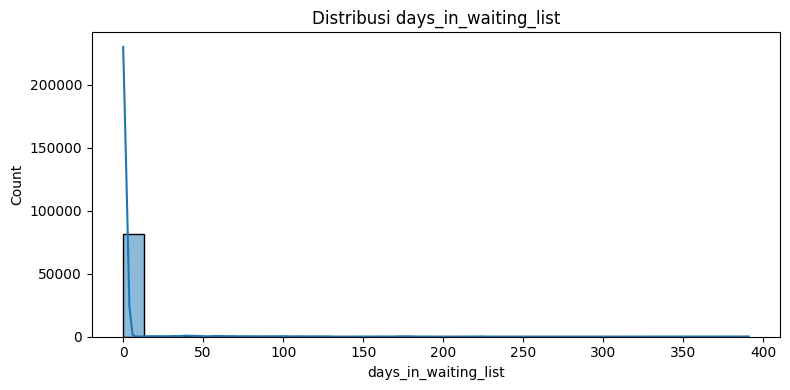

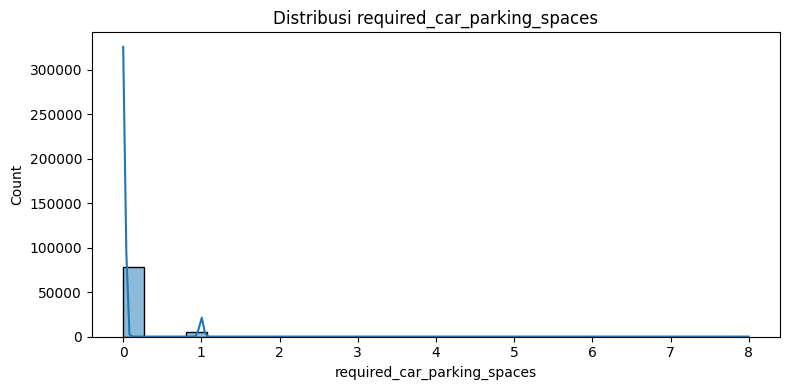

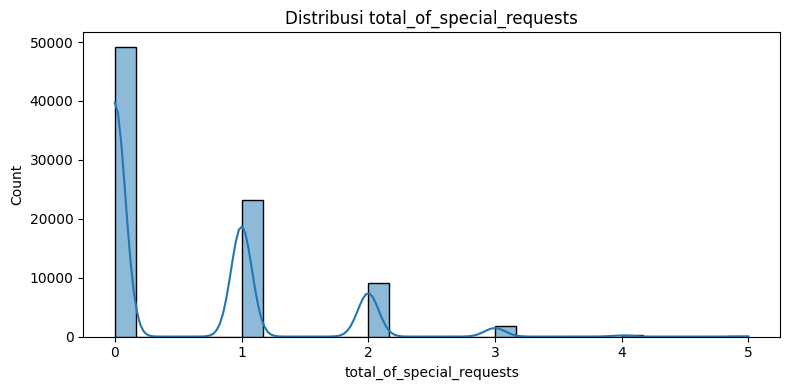

In [11]:
num_cols = ['previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribusi {col}')
    plt.tight_layout()
    plt.show()

Seperti yang kita lihat sebelmunya pada simple EDA, banyak sekali outlier pada kolom numerik.

### Hubungan Kolom-Kolom Kategorikal yang Akan Dijadikan Fitur Terhadap Target

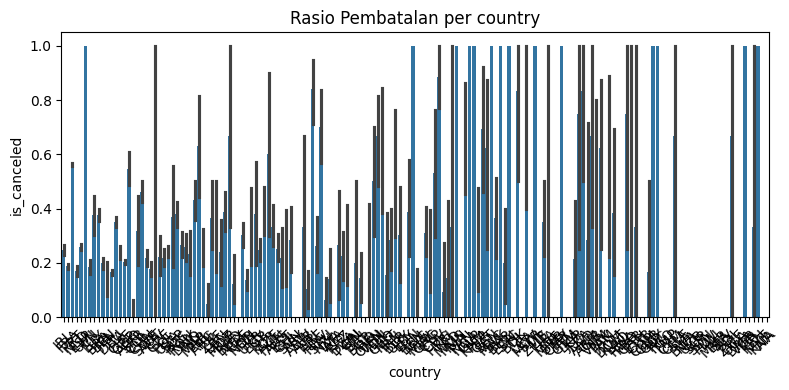

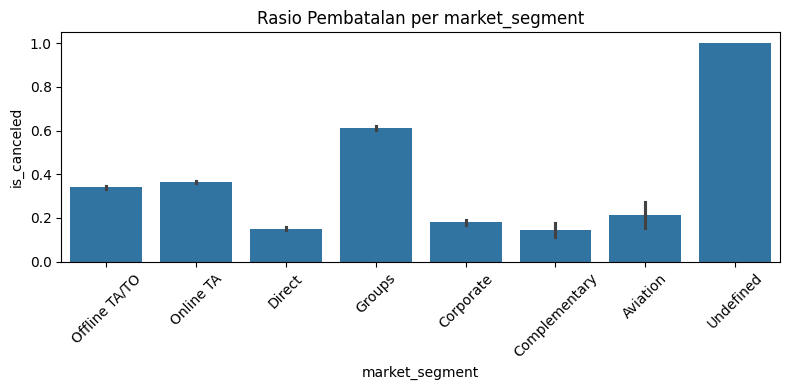

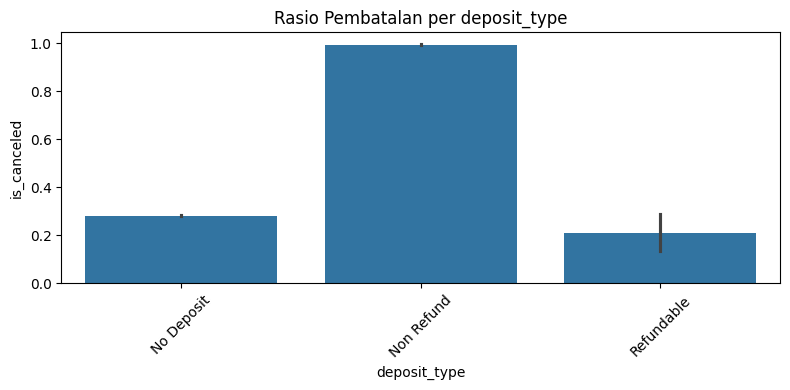

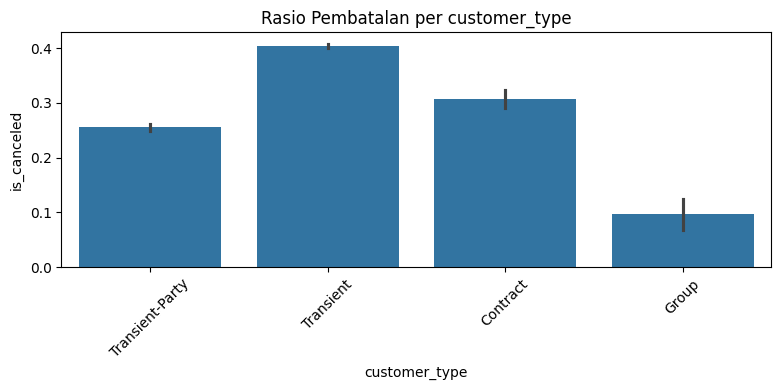

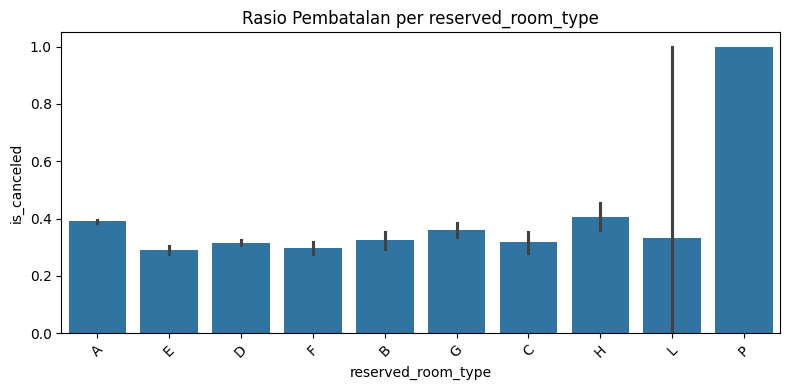

In [12]:
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.barplot(x=col, y='is_canceled', data=df, estimator=lambda x: sum(x)/len(x))
    plt.title(f'Rasio Pembatalan per {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Hubungan Kolom-Kolom Numerikal yang Akan Dijadikan Fitur Terhadap Target

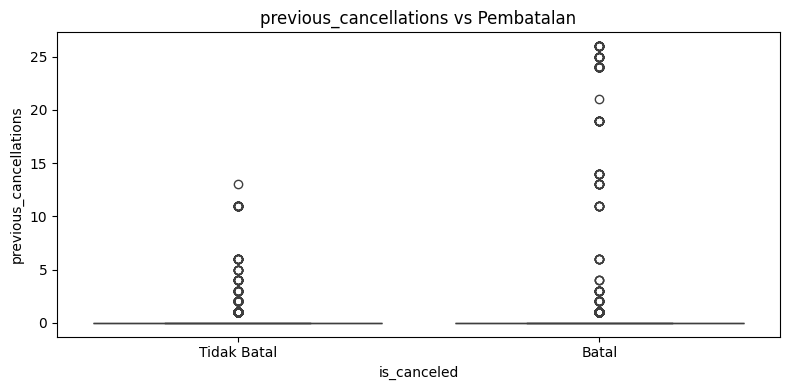

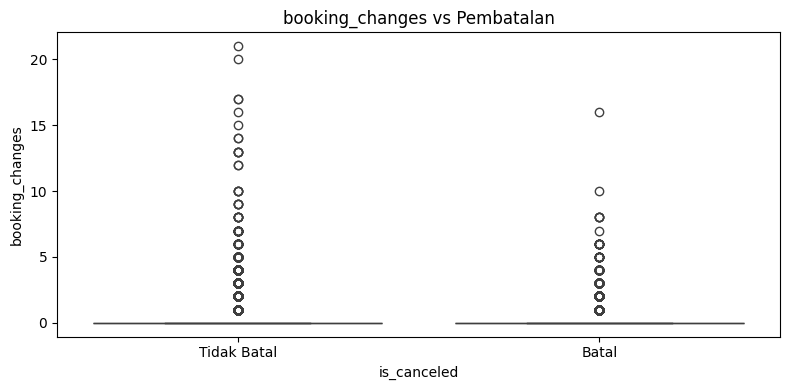

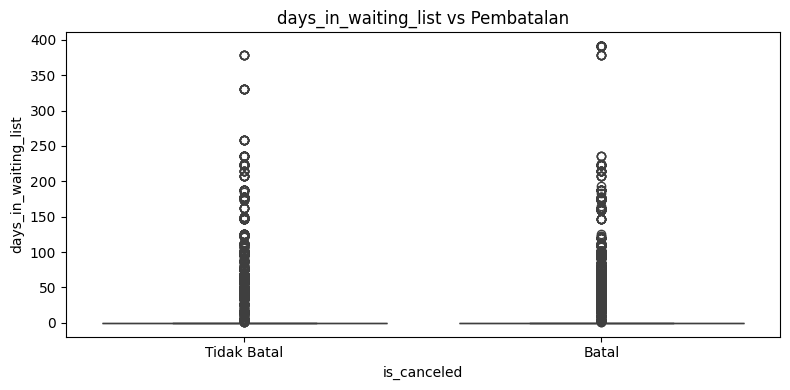

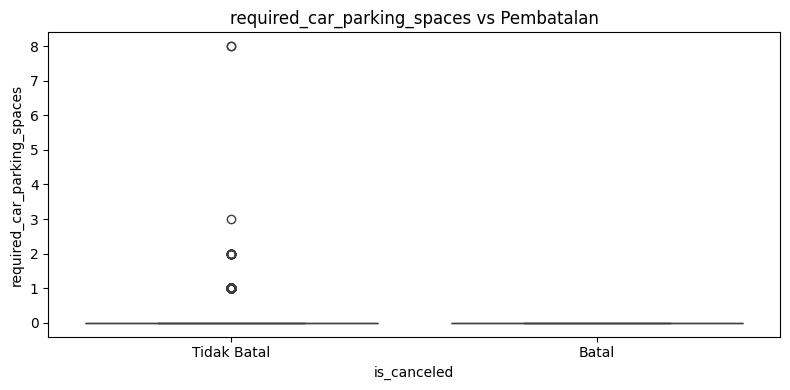

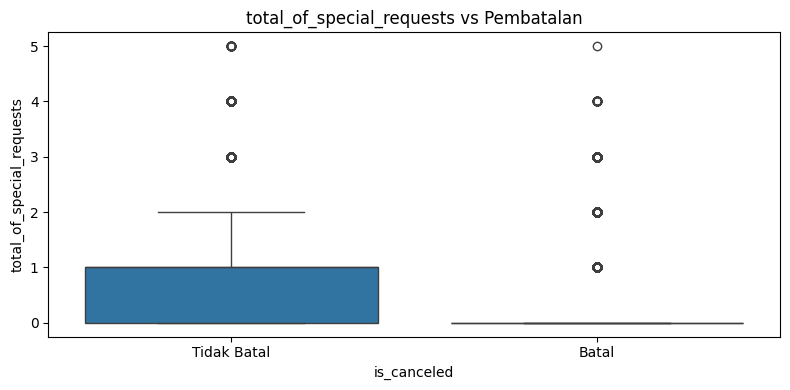

In [69]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='is_canceled', y=col, data=df)
    plt.title(f'{col} vs Pembatalan')
    plt.xticks([0, 1], ['Tidak Batal', 'Batal'])
    plt.tight_layout()
    plt.show()

## Data Preprocessing and Feature Engineering

Sebelum train model machine learning data perlu dipersiapkan terlebih dahulu, begitupun fitur2nya beberapa pengaturan yang dilakukan antara lain:

Drop `market_segment` Undefined langsung pada DataFrame  
Imputing missing value pada kolom `country` dengan konstanta  
Binning pada kolom numerik agar outlier tidak terlalu ekstrim  
Penyesuaian pada kolom `required_car_parking_spaces` menjadi `needs_car_parking_spaces`  
One hot encoding pada kolom `deposit_type`, `customer_type`, `reserved_room_type`, `needs_car_parking_spaces` karena jumlah unique yang tidak terlalu banyak
Binary encoding pada kolom `country`, `market_segment`, `reserved_room_type` karena jumlah unique yang cukup besar
Ordinal encoding pada kolom hasil binning karena kolom-kolom tersebut 
Robust scaling pada kolom `total_of_special_requests`   

Pengaturan dilakukan setelah spliting guna menghindari information leakage (selain Drop `market_segment` Undefined), beberapa dilakukan manual beberapa dilakukan dengan pipeline.  

Penjelasan lebih banyaknya bisa dilihat di setiap stepnya

### Drop `market_segment` Undefined

Undefined adalah nilai pada kolom `market_segment` yang hanya berjumlah 1, baris ini akan didrop karena akan menimbulkan masalah saat pengembangan model.


In [13]:
df = df[df['market_segment'] != 'Undefined']

### Pemisahan fitur dan target

In [14]:
features = df.drop(columns= "is_canceled").columns.to_list()
target = ["is_canceled"]

In [15]:
X = df[features]
y = df[target]

In [16]:
# 1. Fallback Handling Function
def replace_rare_categories_not_in(df, cat_cols, valid_categories):
    df_copy = df.copy()
    for col in cat_cols:
        df_copy[col] = df_copy[col].apply(lambda x: x if x in valid_categories[col] else 'Other')
    return df_copy

# 2. Tentukan kategori valid
valid_categories = {
    'market_segment': ['Online TA', 'Offline TA/TO', 'Direct', 'Groups'],
    'distribution_channel': ['TA', 'Direct', 'Corporate'],
    # Tambahkan kategori valid lainnya sesuai data
}

# 3. Kolom kategorikal yang perlu diproses
cat_cols = ['market_segment', 'distribution_channel', 'reserved_room_type', 'customer_type']

### Data Splitting

Data train 80%, data test 20%. Tidak lupa stratify agar pembagian data seimbang

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,  # supaya hasilnya konsisten
    stratify=y        # menjaga proporsi target (penting untuk class imbalance)
)

>## Preprocessing

### Mengisi missing value pada country dengan konstanta unknown

In [18]:
# Imputing manual antisipasi error
X_train["country"].fillna("unknown", inplace= True)
X_test["country"].fillna("unknown", inplace= True)

### Mengambil top 15 country, menggabungkan sisanya menjadi "Other"

Berdasarkan EDA kolom country berisi banyak unique hingga lebih dari 100, untuk menyederhanakan model kita hanya akan mengambil top 15 karena proporsi total value top 15 mewakili 90%, 10% sisanya digabungkan menjadi other

In [19]:
top_15_countries = df["country"].value_counts().sort_values(ascending=False).head(15)
print(f"Proporsi top 15 country {top_15_countries.sum()}")
# Perbandingan top 15 dari total entri
print(f"Proporsi top 15 country dari total entri dalam persentase {(top_15_countries.sum()/df.shape[0])*100}")

Proporsi top 15 country 75798
Proporsi top 15 country dari total entri dalam persentase 90.69784138228114


In [20]:
X_train['country'] = X_train['country'].apply(lambda x: x if x in top_15_countries else 'Other')
X_test['country'] = X_test['country'].apply(lambda x: x if x in top_15_countries else 'Other')

### Mengubah `required_car_parking_spaces` menjadi `needs_car_parking_spaces`

Kolom `required_car_parking_spaces` diubah menjadi fitur biner `needs_car_parking_space` karena berdasarkan EDA kolom ini didominasi nilai 0 dan tidak ada pembatalan terjadi saat tamu membutuhkan parkir.

In [21]:
# Merubah format parking spaces
X_train["required_car_parking_spaces"] = X_train["required_car_parking_spaces"].apply(lambda x: "Yes" if x > 0 else "No")
X_test["required_car_parking_spaces"] = X_test["required_car_parking_spaces"].apply(lambda x: "Yes" if x > 0 else "No")
# Mengganti nama kolom
X_train.rename(columns= {"required_car_parking_spaces" : "needs_car_parking_spaces"}, inplace=True)
X_test.rename(columns= {"required_car_parking_spaces" : "needs_car_parking_spaces"}, inplace=True)

### Pengaturan pada kolom `previous_cancellations`

#### Binning pada kolom `previous_cancellations`

In [22]:
def bin_previous_cancellations(x):
    if x == 0:
        return 'No Previous'
    elif 1 <= x <= 2:
        return 'Few (1-2)'
    elif 3 <= x <= 9:
        return 'Moderate (3-9)'
    else:  # x >= 10
        return 'Many (10+)'

X_train['previous_cancellations_bin'] = X_train['previous_cancellations'].apply(bin_previous_cancellations)
X_test['previous_cancellations_bin'] = X_test['previous_cancellations'].apply(bin_previous_cancellations)

#### Menambah fitur biner untuk mengklasifikasi tamu yang pernah melakukan pembatalan

In [23]:
X_train['was_cancel'] = (X_train['previous_cancellations'] > 0).astype(int)
X_test['was_cancel'] = (X_test['previous_cancellations'] > 0).astype(int)

#### Membuang kolom `previous_cancellations` yang belum dilakukan binning

In [24]:
X_train.drop(columns="previous_cancellations",inplace=True)
X_test.drop(columns="previous_cancellations",inplace=True)

#### Pengurutan binning

In [25]:
category_order = ['No Previous', 'Few (1-2)', 'Moderate (3-9)', 'Many (10+)']

# Terapkan urutan kategori kustom
X_train['previous_cancellations_bin'] = pd.Categorical(X_train['previous_cancellations_bin'], categories=category_order, ordered=True)
X_test['previous_cancellations_bin'] = pd.Categorical(X_test['previous_cancellations_bin'], categories=category_order, ordered=True)

### Pengaturan pada kolom `days_in_waiting_list`

#### Binning pada kolom `days_in_waiting_list`

In [26]:
def bin_waiting_days(x):
    if x == 0:
        return 'No Wait'
    elif x <= 7:
        return 'Short Wait (1-7)'
    elif x <= 30:
        return 'Medium Wait (8-30)'
    else:
        return 'Long Wait (30+)'

X_train['waiting_list_bin'] = X_train['days_in_waiting_list'].apply(bin_waiting_days)
X_test['waiting_list_bin'] = X_test['days_in_waiting_list'].apply(bin_waiting_days)

#### Menambah fitur biner untuk mengklasifikasi tamu yang menunggu di waiting list

In [27]:
X_train['was_on_waiting_list'] = (X_train['days_in_waiting_list'] > 0).astype(int)
X_test['was_on_waiting_list'] = (X_test['days_in_waiting_list'] > 0).astype(int)

#### Membuang kolom `days_in_waiting_list` yang belum dilakukan binning

In [28]:
X_train.drop(columns= "days_in_waiting_list",inplace=True)
X_test.drop(columns= "days_in_waiting_list",inplace=True)

#### Pengurutan binning

In [29]:
category_order = ['No Wait', 'Short Wait (1-7)', 'Medium Wait (8-30)', 'Long Wait (30+)']

# Terapkan urutan kategori kustom
X_train['waiting_list_bin'] = pd.Categorical(X_train['waiting_list_bin'], categories=category_order, ordered=True)
X_test['waiting_list_bin'] = pd.Categorical(X_test['waiting_list_bin'], categories=category_order, ordered=True)

### Pengaturan pada kolom `booking_changes`

#### Binning pada kolom `booking_changes`

In [30]:
def bin_booking_changes(x):
    if x == 0:
        return 'No Change'
    elif x == 1:
        return 'One Change'
    elif x <= 3:
        return 'Few Changes (2-3)'
    else:
        return 'Many Changes (4+)'

X_train['booking_changes_bin'] = X_train['booking_changes'].apply(bin_booking_changes)
X_test['booking_changes_bin'] = X_test['booking_changes'].apply(bin_booking_changes)

#### Menambah fitur biner untuk mengklasifikasi tamu yang pernah melakukan perubahan booking

In [31]:
X_train['has_changed_booking'] = (X_train['booking_changes'] > 0).astype(int)
X_test['has_changed_booking'] = (X_test['booking_changes'] > 0).astype(int)

#### Membuang kolom `booking_changes` yang belum dilakukan binning

In [32]:
X_train.drop(columns= "booking_changes",inplace=True)
X_test.drop(columns= "booking_changes",inplace=True)

#### Pengurutan binning

In [33]:
category_order = ['No Change', 'One Change', 'Few Changes (2-3)', 'Many Changes (4+)']

# Terapkan urutan kategori kustom
X_train['booking_changes_bin'] = pd.Categorical(X_train['booking_changes_bin'], categories=category_order, ordered=True)
X_test['booking_changes_bin'] = pd.Categorical(X_test['booking_changes_bin'], categories=category_order, ordered=True)

### Mengubah format `reseverved_room_types`

Berdasarkan hasil EDA sebelumnya, tipe kamar `reserved_room_type` 'P' dan 'L' memiliki jumlah yang sangat sedikit. Oleh karena itu, kedua tipe kamar ini digabung ke dalam kategori 'Other' untuk menyederhanakan fitur dan mengurangi risiko overfitting.

In [34]:
rare_rooms = ['P', 'L']

X_train['reserved_room_type'] = X_train['reserved_room_type'].apply(
    lambda x: x if x not in rare_rooms else 'Other'
)

X_test['reserved_room_type'] = X_test['reserved_room_type'].apply(
    lambda x: x if x not in rare_rooms else 'Other'
)

>## Training Model

## Baseline Model (LogReg, KNN, Decision Tree) Tanpa Hyperparameter Tuning

Pertama - tama mari kita train model machine learning dengan baseline model (LogReg, KNN, Decision Tree) tanpa hyper parameter tuning, kita akan melihat nilai score rata2 validasi dan score prediksinya

#### Validasi Model dengan Cross-Validation

In [35]:
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=42)

In [36]:
models = [logreg,knn,tree]
score=[]
rata=[]
std=[]

transformer = ColumnTransformer([
                                 ('ohe',OneHotEncoder(drop='first'), ["deposit_type", "customer_type", "reserved_room_type", "needs_car_parking_spaces"]),
                                 ('orde', OrdinalEncoder(), ["previous_cancellations_bin", "waiting_list_bin", "booking_changes_bin"]),
                                 ('bin_enc', ce.BinaryEncoder(), ["country", "market_segment", "reserved_room_type"]),
                                 ('robust_scaler', RobustScaler(), ["total_of_special_requests"]) # Scaling penting untuk KNN dan LogReg tetapi tidak berpenagruh banyak pada Decision Tree
                                ], remainder='passthrough')

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring='recall')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
df_baseline_model_without_hp = pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree'],'mean recall':rata,'sdev':std}).set_index('model').sort_values(by='mean recall',ascending=False)
df_baseline_model_without_hp

,mean recall,sdev
model,,
Decision Tree,0.695951,0.008388
KNN,0.664430,0.035585
Logistic Regression,0.532673,0.026924


#### Prediksi dan Evaluasi pada Data Test

In [37]:
models = [logreg,knn,tree]
score_recall = []

transformer = ColumnTransformer([
                                 ('ohe',OneHotEncoder(drop='first'), ["deposit_type", "customer_type", "reserved_room_type", "needs_car_parking_spaces"]),
                                 ('orde', OrdinalEncoder(), ["previous_cancellations_bin", "waiting_list_bin", "booking_changes_bin"]),
                                 ('bin_enc', ce.BinaryEncoder(), ["country", "market_segment", "reserved_room_type"]),
                                 ('robust_scaler', RobustScaler(), ["total_of_special_requests"]) # Scaling penting untuk KNN dan LogReg tetapi tidak berpenagruh banyak pada Decision Tree
                                ], remainder='passthrough')

def y_pred_func(model, X_train, X_test, y_train):
    estimator = Pipeline([
        ('preprocess', transformer),
        ('model', model)
    ])
    estimator.fit(X_train, y_train)
    return estimator, estimator.predict(X_test)

# Pastikan X_train, X_test, y_train, y_test sudah didefinisikan sebelumnya
for model, name in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree']):
    estimator, y_pred = y_pred_func(model, X_train, X_test, y_train)
    recall = recall_score(y_test, y_pred)
    score_recall.append(recall)
    print(name, '\n', classification_report(y_test, y_pred))

pd.DataFrame({
    'model': ['Logistic Regression', 'KNN', 'Decision Tree'],
    'recall score': score_recall
}).set_index('model').sort_values(by='recall score', ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.77      0.94      0.85     10559
           1       0.83      0.52      0.64      6156

    accuracy                           0.78     16715
   macro avg       0.80      0.73      0.74     16715
weighted avg       0.79      0.78      0.77     16715

KNN 
               precision    recall  f1-score   support

           0       0.81      0.87      0.84     10559
           1       0.74      0.64      0.69      6156

    accuracy                           0.78     16715
   macro avg       0.77      0.76      0.76     16715
weighted avg       0.78      0.78      0.78     16715

Decision Tree 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85     10559
           1       0.76      0.70      0.73      6156

    accuracy                           0.81     16715
   macro avg       0.80      0.79      0.79     16715
weighted avg       0.81      0

,recall score
model,
Decision Tree,0.698668
KNN,0.642788
Logistic Regression,0.516082


Dari sini kita dapatkan Decision Tree memiliki skor recall tertinggi, selain itu membandingkan skor pada rata2 cross validation dan data test tidak terlihat ada tanda2 overfitting, selnjutnya mari kita train dengan hyperparameter tuning

## Base Model (LogReg, KNN, Decision Tree) Dengan Hyperparameter Tuning


### LogReg with Hyperparameter Tuning 

#### Validasi Model dengan Cross-Validation

In [38]:
transformer = ColumnTransformer([
                                 ('ohe',OneHotEncoder(drop='first'), ["deposit_type", "customer_type", "reserved_room_type", "needs_car_parking_spaces"]),
                                 ('orde', OrdinalEncoder(), ["previous_cancellations_bin", "waiting_list_bin", "booking_changes_bin"]),
                                 ('bin_enc', ce.BinaryEncoder(), ["country", "market_segment", "reserved_room_type"]),
                                 ('robust_scaler', RobustScaler(), ["total_of_special_requests"]) # robust scaling agar tahan outlier
                                ], remainder='passthrough')

pipeline_logreg = Pipeline([
    ('preprocessor', transformer),          
    ('logreg', LogisticRegression(solver= "liblinear", random_state= 42)) 
    ])

hyperparam_space = {
    'logreg__penalty': ['l1', 'l2'],
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'logreg__solver': ['liblinear', 'saga'],  
}

skfold = StratifiedKFold(n_splits = 5)


random_search = RandomizedSearchCV(
    estimator=pipeline_logreg,
    param_distributions=hyperparam_space, 
    n_iter=50,  
    cv=skfold,  
    scoring='recall',
    n_jobs=-1,
    random_state=42,
    verbose=1 
)

random_search.fit(X_train, y_train)

cv_scores = random_search.cv_results_['mean_test_score']
mean_overall = np.mean(cv_scores)
std_dev = np.std(cv_scores)

# Menyimpan rata2 dan standard deviasi model
logreg_with_hp_mean = mean_overall
logreg_with_hp_std = std_dev

print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)
print("Rata-rata keseluruhan skor CV:", mean_overall)
print("Standar Deviasi dari skor CV:", std_dev)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'logreg__solver': 'liblinear', 'logreg__penalty': 'l1', 'logreg__C': 10}
Best CV Score: 0.53831898460663
Rata-rata keseluruhan skor CV: 0.512103446154819
Standar Deviasi dari skor CV: 0.04622236613620627


#### Prediksi dan Evaluasi pada Data Test

In [39]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)


print(recall_score(y_test, y_pred))

# Mencetak classification report untuk metrik lebih lengkap
print(classification_report(y_test, y_pred))

0.5160818713450293
              precision    recall  f1-score   support

           0       0.77      0.94      0.85     10559
           1       0.83      0.52      0.64      6156

    accuracy                           0.78     16715
   macro avg       0.80      0.73      0.74     16715
weighted avg       0.79      0.78      0.77     16715



### KNN with Hyperparameter Tuning

#### Validasi Model dengan Cross-Validation

In [40]:
transformer = ColumnTransformer([
                                 ('ohe',OneHotEncoder(drop='first'), ["deposit_type", "customer_type", "reserved_room_type", "needs_car_parking_spaces"]),
                                 ('orde', OrdinalEncoder(), ["previous_cancellations_bin", "waiting_list_bin", "booking_changes_bin"]),
                                 ('bin_enc', ce.BinaryEncoder(), ["country", "market_segment", "reserved_room_type"]),
                                 ('robust scaler', RobustScaler(), ["total_of_special_requests"]) # Scaling dengan standard sclaer karena outlier sudah ditangani
                                ], remainder='passthrough')

pipeline_knn = Pipeline([
    ('preprocessor', transformer),          # Step 1: Preprocessing pakai ColumnTransformer
    ('knn', KNeighborsClassifier()) 
    ])

hyperparam_space = {
    'knn__n_neighbors': [3, 5 ,9],
    'knn__weights': ['distance'], # 'distance'
    'knn__metric': ['euclidean', 'manhattan'] # 'euclidean', 'manhattan'
}

skfold = StratifiedKFold(n_splits = 5)


random_search = RandomizedSearchCV(
    estimator=pipeline_knn,
    param_distributions=hyperparam_space,  
    n_iter=50, 
    cv=skfold,  
    scoring='recall',  
    n_jobs=-1, 
    random_state=42,  
    verbose=1  
)

random_search.fit(X_train, y_train)

cv_scores = random_search.cv_results_['mean_test_score']
mean_overall = np.mean(cv_scores)
std_dev = np.std(cv_scores)

# Menyimpan rata2 dan standard deviasi model
knn_with_hp_mean = mean_overall
knn_with_hp_std = std_dev

print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)
print("Rata-rata keseluruhan skor CV:", mean_overall)
print("Standar Deviasi dari skor CV:", std_dev)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'knn__weights': 'distance', 'knn__n_neighbors': 3, 'knn__metric': 'euclidean'}
Best CV Score: 0.6837238182815341
Rata-rata keseluruhan skor CV: 0.6618782976711325
Standar Deviasi dari skor CV: 0.019024531265408207


#### Prediksi dan Evaluasi pada Data Test

In [41]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)


print(recall_score(y_test, y_pred))

# Mencetak classification report untuk metrik lebih lengkap
print(classification_report(y_test, y_pred))

0.684535412605588
              precision    recall  f1-score   support

           0       0.82      0.84      0.83     10559
           1       0.71      0.68      0.70      6156

    accuracy                           0.78     16715
   macro avg       0.77      0.76      0.76     16715
weighted avg       0.78      0.78      0.78     16715



### Decision Tree with Hyperparameter Tuning

#### Validasi Model dengan Cross-Validation

In [42]:
transformer = ColumnTransformer([
                                 ('ohe', OneHotEncoder(drop='first'), ["deposit_type", "customer_type", "reserved_room_type", "needs_car_parking_spaces"]),
                                 ('orde', OrdinalEncoder(), ["previous_cancellations_bin", "waiting_list_bin", "booking_changes_bin"]),
                                 ('bin_enc', ce.BinaryEncoder(), ["country", "market_segment", "reserved_room_type"]) # Tidak memerlukan scaling
                                ], remainder='passthrough')

pipeline_tree = Pipeline([
    ('preprocessor', transformer), # Step 1: Preprocessing pakai ColumnTransformer
    ('tree', DecisionTreeClassifier(random_state=42)) 
    ])

hyperparam_space = {
    'tree__criterion': ['gini', 'entropy'],
    'tree__max_depth': [2, 3, 4, 5],
    'tree__min_samples_split': [2, 5],
    'tree__min_samples_leaf': [2, 4],
    'tree__max_features': ['sqrt', 'log2'],
    'tree__class_weight': ['balanced']
}

skfold = StratifiedKFold(n_splits = 5, random_state=42, shuffle=True)


random_search = RandomizedSearchCV(
    estimator=pipeline_tree,
    param_distributions=hyperparam_space,
    n_iter=50,  
    cv=skfold,  
    scoring='recall',  
    n_jobs=-1,  
    random_state=42, 
    verbose=1  
)

random_search.fit(X_train, y_train)

cv_scores = random_search.cv_results_['mean_test_score']
mean_overall = np.mean(cv_scores)
std_dev = np.std(cv_scores)

# Menyimpan rata2 dan standard deviasi model
tree_with_hp_mean = mean_overall
tree_with_hp_std = std_dev

print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)
print("Rata-rata keseluruhan skor CV:", mean_overall)
print("Standar Deviasi dari skor CV:", std_dev)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'tree__min_samples_split': 5, 'tree__min_samples_leaf': 4, 'tree__max_features': 'log2', 'tree__max_depth': 3, 'tree__criterion': 'entropy', 'tree__class_weight': 'balanced'}
Best CV Score: 0.9384265608827785
Rata-rata keseluruhan skor CV: 0.7770266021187017
Standar Deviasi dari skor CV: 0.17698986362860028


Jika kita perhatikan perbedaan best cv score dengan rata2nya cukup signifikan, bisa dikatakan model decision tree kurang konsisten.

#### Prediksi dan Evaluasi pada Data Test

In [43]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)


print(recall_score(y_test, y_pred))

# Mencetak classification report untuk metrik lebih lengkap
print(classification_report(y_test, y_pred))

0.9381091617933723
              precision    recall  f1-score   support

           0       0.85      0.21      0.33     10559
           1       0.41      0.94      0.57      6156

    accuracy                           0.48     16715
   macro avg       0.63      0.57      0.45     16715
weighted avg       0.69      0.48      0.42     16715



## Ensemble Model (Random Forest, Xgboost, lgb) Tanpa Hyperparameter Tuning

#### Validasi Model dengan Cross-Validation

In [44]:
rf = RandomForestClassifier(random_state= 42)
xgb = XGBClassifier(random_state= 42)
lgbm = lgb.LGBMClassifier(random_state= 42, verbosity= -1)

In [45]:
models = [rf,xgb,lgbm]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5, shuffle=True, random_state= 42)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring='recall')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
df_ensemble_model_without_hp = pd.DataFrame({'model':['Random Forest', 'XGBoost', 'LightGBM'],'mean recall':rata,'sdev':std}).set_index('model').sort_values(by='mean recall',ascending=False)
df_ensemble_model_without_hp

,mean recall,sdev
model,,
Random Forest,0.699768,0.010187
LightGBM,0.688274,0.008982
XGBoost,0.686649,0.004464


#### Prediksi dan Evaluasi pada Data Test

In [46]:
models = [rf,xgb,lgbm]
score_recall = []

transformer = ColumnTransformer([
                                 ('ohe',OneHotEncoder(drop='first'), ["deposit_type", "customer_type", "reserved_room_type", "needs_car_parking_spaces"]),
                                 ('orde', OrdinalEncoder(), ["previous_cancellations_bin", "waiting_list_bin", "booking_changes_bin"]),
                                 ('bin_enc', ce.BinaryEncoder(), ["country", "market_segment", "reserved_room_type"])
                                ], remainder='passthrough')

def y_pred_func(model, X_train, X_test, y_train):
    estimator = Pipeline([
        ('preprocess', transformer),
        ('model', model)
    ])
    estimator.fit(X_train, y_train)
    return estimator, estimator.predict(X_test)

# Pastikan X_train, X_test, y_train, y_test sudah didefinisikan sebelumnya
for model, name in zip(models, ['Random Forest', 'XGBoost', 'LightGBM']):
    estimator, y_pred = y_pred_func(model, X_train, X_test, y_train)
    recall = recall_score(y_test, y_pred)
    score_recall.append(recall)
    print(name, '\n', classification_report(y_test, y_pred))

pd.DataFrame({
    'model': ['Random Forest', 'XGBoost', 'LightGBM'],
    'recall score': score_recall
}).set_index('model').sort_values(by='recall score', ascending=False)

Random Forest 
               precision    recall  f1-score   support

           0       0.84      0.87      0.85     10559
           1       0.76      0.70      0.73      6156

    accuracy                           0.81     16715
   macro avg       0.80      0.79      0.79     16715
weighted avg       0.81      0.81      0.81     16715

XGBoost 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86     10559
           1       0.78      0.68      0.73      6156

    accuracy                           0.81     16715
   macro avg       0.80      0.79      0.79     16715
weighted avg       0.81      0.81      0.81     16715

LightGBM 
               precision    recall  f1-score   support

           0       0.83      0.88      0.86     10559
           1       0.78      0.68      0.73      6156

    accuracy                           0.81     16715
   macro avg       0.80      0.78      0.79     16715
weighted avg       0.81      0.81    

,recall score
model,
Random Forest,0.704678
LightGBM,0.684211
XGBoost,0.682749


## Ensemble Model (Random Forest, XGBoost, LightGBM) Dengan Hyperparameter Tuning

### Random Forest with Hyperparameter Tuning

#### Validasi Model dengan Cross-Validation

In [47]:
transformer = ColumnTransformer([
                                 ('ohe', OneHotEncoder(drop='first'), ["deposit_type", "customer_type", "reserved_room_type", "needs_car_parking_spaces"]),
                                 ('orde', OrdinalEncoder(), ["previous_cancellations_bin", "waiting_list_bin", "booking_changes_bin"]),
                                 ('bin_enc', ce.BinaryEncoder(), ["country", "market_segment", "reserved_room_type"]),
                                 ('robust_scaler', RobustScaler(), ["total_of_special_requests"]) 
                                ], remainder='passthrough')

pipeline_rf = Pipeline([
    ('preprocessor', transformer),         
    ('rf', RandomForestClassifier(random_state=42)) 
    ])

hyperparam_space = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [10, 20],
    'rf__min_samples_leaf': [3, 5, 7],
    'rf__class_weight': ['balanced']
}

skfold = StratifiedKFold(n_splits = 5, random_state=42, shuffle=True)


random_search = RandomizedSearchCV(
    estimator=pipeline_rf,
    param_distributions=hyperparam_space,  
    n_iter=50,  
    cv=skfold,   
    scoring='recall',  
    n_jobs=-1,  
    random_state=42,  
    verbose=1  
)

random_search.fit(X_train, y_train)

cv_scores = random_search.cv_results_['mean_test_score']
mean_overall = np.mean(cv_scores)
std_dev = np.std(cv_scores)

# Menyimpan rata2 dan standard deviasi model
rf_with_hp_mean = mean_overall
rf_with_hp_std = std_dev

print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)
print("Rata-rata keseluruhan skor CV:", mean_overall)
print("Standar Deviasi dari skor CV:", std_dev)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'rf__n_estimators': 100, 'rf__min_samples_leaf': 3, 'rf__max_depth': 20, 'rf__class_weight': 'balanced'}
Best CV Score: 0.7785224508983244
Rata-rata keseluruhan skor CV: 0.7528532681530843
Standar Deviasi dari skor CV: 0.02071987791144803


#### Prediksi dan Evaluasi pada Data Test

In [48]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)


print(recall_score(y_test, y_pred))

# Mencetak classification report untuk metrik lebih lengkap
print(classification_report(y_test, y_pred))

0.7722547108512021
              precision    recall  f1-score   support

           0       0.86      0.81      0.83     10559
           1       0.70      0.77      0.74      6156

    accuracy                           0.80     16715
   macro avg       0.78      0.79      0.78     16715
weighted avg       0.80      0.80      0.80     16715



Begitupula pada prediksi, terlihat performa model cukup baik mengingat sekornya tidak jauh dengan skor validasinya

### XGBoost with Hyperparameter Tuning

#### Validasi Model dengan Cross-Validation

In [49]:
transformer = ColumnTransformer([
                                 ('ohe', OneHotEncoder(drop='first'), ["deposit_type", "customer_type", "reserved_room_type", "needs_car_parking_spaces"]),
                                 ('orde', OrdinalEncoder(), ["previous_cancellations_bin", "waiting_list_bin", "booking_changes_bin"]),
                                 ('bin_enc', ce.BinaryEncoder(), ["country", "market_segment", "reserved_room_type"])
                                ], remainder='passthrough')

pipeline_xgb = Pipeline([
    ('preprocessor', transformer),          # Step 1: Preprocessing pakai ColumnTransformer
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state= 42))
    ])

param_dist = {
    'xgb__n_estimators': [100, 200],
    'xgb__learning_rate': uniform(0.01, 0.3),  # uniform distribution untuk learning rate
    'xgb__max_depth': [3, 4, 5, 6],
    'xgb__min_child_weight': [2, 3],
    'xgb__subsample': uniform(0.6, 0.4),  # random sampling dari subset data
    'xgb__colsample_bytree': uniform(0.6, 0.4)  # random sampling untuk kolom
}

skfold = StratifiedKFold(n_splits = 5, random_state=42, shuffle=True)


random_search = RandomizedSearchCV(
    estimator=pipeline_xgb,
    param_distributions=param_dist,  
    n_iter=20,  
    cv=skfold,  
    scoring='recall',  
    n_jobs=-1,  
    random_state=42,  
    verbose=1  
)

random_search.fit(X_train, y_train)

cv_scores = random_search.cv_results_['mean_test_score']
mean_overall = np.mean(cv_scores)
std_dev = np.std(cv_scores)

# Menyimpan rata2 dan standard deviasi model
xgb_with_hp_mean = mean_overall
xgb_with_hp_std = std_dev

print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)
print("Rata-rata keseluruhan skor CV:", mean_overall)
print("Standar Deviasi dari skor CV:", std_dev)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'xgb__colsample_bytree': np.float64(0.8493192507310232), 'xgb__learning_rate': np.float64(0.10926940745579475), 'xgb__max_depth': 6, 'xgb__min_child_weight': 2, 'xgb__n_estimators': 100, 'xgb__subsample': np.float64(0.8675365010654429)}
Best CV Score: 0.6836032197008747
Rata-rata keseluruhan skor CV: 0.6321736118957391
Standar Deviasi dari skor CV: 0.09896327224257123


#### Prediksi dan Evaluasi pada Data Test

In [50]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)


print(recall_score(y_test, y_pred))

# Mencetak classification report untuk metrik lebih lengkap
print(classification_report(y_test, y_pred))

0.676575698505523
              precision    recall  f1-score   support

           0       0.82      0.89      0.86     10559
           1       0.78      0.68      0.72      6156

    accuracy                           0.81     16715
   macro avg       0.80      0.78      0.79     16715
weighted avg       0.81      0.81      0.81     16715



### LightGBM with Hyperparameter Tuning

#### Validasi Model dengan Cross-Validation

In [51]:
transformer = ColumnTransformer([
                                 ('ohe', OneHotEncoder(drop='first'), ["deposit_type", "customer_type", "reserved_room_type", "needs_car_parking_spaces"]),
                                 ('orde', OrdinalEncoder(), ["previous_cancellations_bin", "waiting_list_bin", "booking_changes_bin"]),
                                 ('bin_enc', ce.BinaryEncoder(), ["country", "market_segment", "reserved_room_type"])
                                ], remainder='passthrough')

pipeline_lgbm = Pipeline([
    ('preprocessor', transformer),          # Step 1: Preprocessing pakai ColumnTransformer
    ('lgbm', LGBMClassifier(random_state=42, n_jobs=-1))
    ])

param_dist = {
    'lgbm__num_leaves': randint(20, 150),
    'lgbm__max_depth': randint(3, 15),
    'lgbm__learning_rate': uniform(0.01, 0.2),
    'lgbm__n_estimators': randint(100, 1000),
    'lgbm__min_child_samples': randint(10, 100),
    'lgbm__subsample': uniform(0.6, 0.4),
    'lgbm__colsample_bytree': uniform(0.6, 0.4),
    'lgbm__reg_alpha': uniform(0.0, 2.0),
    'lgbm__reg_lambda': uniform(0.0, 2.0),
}

skfold = StratifiedKFold(n_splits = 5, random_state=42, shuffle=True)


random_search = RandomizedSearchCV(
    estimator=pipeline_lgbm,
    param_distributions=param_dist, 
    n_iter=20,  
    cv=skfold,  
    scoring='recall',  
    n_jobs=-1,  
    random_state=42,  
    verbose=1  
)

random_search.fit(X_train, y_train)

cv_scores = random_search.cv_results_['mean_test_score']
mean_overall = np.mean(cv_scores)
std_dev = np.std(cv_scores)

# Menyimpan rata2 dan standard deviasi model
lgbm_with_hp_mean = mean_overall
lgbm_with_hp_std = std_dev

print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)
print("Rata-rata keseluruhan skor CV:", mean_overall)
print("Standar Deviasi dari skor CV:", std_dev)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'lgbm__colsample_bytree': np.float64(0.749816047538945), 'lgbm__learning_rate': np.float64(0.20014286128198325), 'lgbm__max_depth': 13, 'lgbm__min_child_samples': 81, 'lgbm__n_estimators': 800, 'lgbm__num_leaves': 40, 'lgbm__reg_alpha': np.float64(0.31203728088487304), 'lgbm__reg_lambda': np.float64(0.3119890406724053), 'lgbm__subsample': np.float64(0.6232334448672797)}
Best CV Score: 0.6900611776154916
Rata-rata keseluruhan skor CV: 0.6749155199643722
Standar Deviasi dari skor CV: 0.030907283526039272


#### Prediksi dan Evaluasi pada Data Test

In [52]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)


print(recall_score(y_test, y_pred))

# Mencetak classification report untuk metrik lebih lengkap
print(classification_report(y_test, y_pred))

0.6859974009096816
              precision    recall  f1-score   support

           0       0.83      0.88      0.86     10559
           1       0.78      0.69      0.73      6156

    accuracy                           0.81     16715
   macro avg       0.80      0.78      0.79     16715
weighted avg       0.81      0.81      0.81     16715



## Kesimpulan hasil dari eksplorasi beberapa model

### Berikut adalah performa setiap model

Baseline Model Tanpa Hyperparameter Tuning

In [53]:
df_baseline_model_without_hp

,mean recall,sdev
model,,
Decision Tree,0.695951,0.008388
KNN,0.664430,0.035585
Logistic Regression,0.532673,0.026924


Baseline model dengan hyperparameter tuning

In [54]:
model_names = ['Logistic Regression', 'KNN', 'Decision Tree']

rata = [logreg_with_hp_mean, knn_with_hp_mean, tree_with_hp_mean]
std = [logreg_with_hp_std, logreg_with_hp_std, tree_with_hp_std]

df_cv_result_baseline_with_hp = pd.DataFrame({
    'model': model_names,
    'mean recall': rata,
    'sdev': std
}).set_index('model').sort_values(by='mean recall', ascending=False)

df_cv_result_baseline_with_hp


,mean recall,sdev
model,,
Decision Tree,0.777027,0.176990
KNN,0.661878,0.046222
Logistic Regression,0.512103,0.046222


Terlihat peningkatan yang signifikan pada Model Decision Tree, hanya saja standard deviasinya terbilang sangat tinggi sehingga bisa dikatakan model kurang konsisten, sedangkan dua model lainnya tidak mengalami banyak perubahan

Ensemble Model Tanpa Hyperparameter Tuning

In [55]:
df_ensemble_model_without_hp

,mean recall,sdev
model,,
Random Forest,0.699768,0.010187
LightGBM,0.688274,0.008982
XGBoost,0.686649,0.004464


Ensemble Model Dengan Hyperparameter Tuning

In [56]:
model_names = ['Random Forest', 'XGBoost', 'LightGBM']

rata = [rf_with_hp_mean, xgb_with_hp_mean, lgbm_with_hp_mean]
std = [rf_with_hp_std, xgb_with_hp_std, lgbm_with_hp_std]

df_cv_result_ensemble_with_hp = pd.DataFrame({
    'model': model_names,
    'mean recall': rata,
    'sdev': std
}).set_index('model').sort_values(by='mean recall', ascending=False)

df_cv_result_ensemble_with_hp

,mean recall,sdev
model,,
Random Forest,0.752853,0.020720
LightGBM,0.674916,0.030907
XGBoost,0.632174,0.098963


Dari beberapa model yang sudah diuji, baseline maupun ensemble, model yang dipilih adalah random forest dengan rata-rata score recall tertinggi dan standard deviasi yang rendah, selanjutnya mari kita dalami model lebih lanjut.

>## Interpretasi dan Contoh Penggunaan Model

kali ini kita akan melakukan retrain pada model yang kita pilih dengan perubahan encoding pada `country`, `market_segment`, `reserved_room_type`, yang sebelumnya dilakukan dengan binary encoding kali ini kita lakukan dengan one hot encoding agar fitur-fitur penting setidaknya bisa lebih terbaca.

Model yang kita pilih adalah Random Forest



### Retrain model terpilih

In [57]:
transformer = ColumnTransformer([
                                 ('ohe', OneHotEncoder(drop='first'), ["deposit_type", "customer_type", "reserved_room_type", "needs_car_parking_spaces", "country", "market_segment", "reserved_room_type"]),
                                 ('orde', OrdinalEncoder(), ["previous_cancellations_bin", "waiting_list_bin", "booking_changes_bin"]),
                                 ('robust_scaler', RobustScaler(), ["total_of_special_requests"]) 
                                ], remainder='passthrough')

pipeline_rf = Pipeline([
    ('preprocessor', transformer),         
    ('rf', RandomForestClassifier(random_state=42)) 
    ])

hyperparam_space = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [10, 20],
    'rf__min_samples_leaf': [3, 5, 7],
    'rf__class_weight': ['balanced']
}

skfold = StratifiedKFold(n_splits = 5, random_state=42, shuffle=True)


random_search = RandomizedSearchCV(
    estimator=pipeline_rf,
    param_distributions=hyperparam_space,  
    n_iter=50,  
    cv=skfold,   
    scoring='recall',  
    n_jobs=-1,  
    random_state=42,  
    verbose=1  
)

random_search.fit(X_train, y_train)

# Mengambil estimator terbaik
best_model = random_search.best_estimator_
rf_model = best_model.named_steps['rf']

# Mengekstrak nama fitur dari tahapan preprocessor pada pipeline
preprocessor = best_model.named_steps['preprocessor']
feature_names = preprocessor.get_feature_names_out()

cv_scores = random_search.cv_results_['mean_test_score']
mean_overall = np.mean(cv_scores)
std_dev = np.std(cv_scores)

print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)
print("Rata-rata keseluruhan skor CV:", mean_overall)
print("Standar Deviasi dari skor CV:", std_dev)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'rf__n_estimators': 100, 'rf__min_samples_leaf': 3, 'rf__max_depth': 20, 'rf__class_weight': 'balanced'}
Best CV Score: 0.7747855195932487
Rata-rata keseluruhan skor CV: 0.7642525720907024
Standar Deviasi dari skor CV: 0.009137051728631827


#### Prediksi dan Evaluasi pada Data Test

In [70]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)


print(recall_score(y_test, y_pred))

# Mencetak classification report untuk metrik lebih lengkap
print(classification_report(y_test, y_pred))

0.7657569850552307
              precision    recall  f1-score   support

           0       0.86      0.82      0.84     10559
           1       0.71      0.77      0.74      6156

    accuracy                           0.80     16715
   macro avg       0.78      0.79      0.79     16715
weighted avg       0.80      0.80      0.80     16715



Setelah dilakukan retrain dengan beberapa penyesuaian, terlihat adanya peningkatan pada rata-rata recall score dan penurunan pada standard deviasi antar fold. Hal ini menunjukkan bahwa model menjadi lebih stabil.

Stabilitas ini juga terlihat dari hasil pengujian pada data test, di mana nilai recall tidak jauh berbeda dari rata-rata skor pada cross-validation. Ini mengindikasikan bahwa model tidak hanya fit pada data latih, tetapi juga memiliki performa yang konsisten pada data yang belum pernah dilihat sebelumnya.

### Menyimpan model dalam format pkl (pickle)

Menyimpan model terbaik

In [89]:
import pickle

# Tentukan path tempat menyimpan file pickle
path = r'C:\Users\Hewlett Packard\Desktop\SAYA\Capstone 3/best_rf_model_for_hotel_booking_cancellation_prediction.pkl'

# Simpan best_model ke dalam file pickle di path yang ditentukan
with open(path, 'wb') as file:
    pickle.dump(best_model, file)


### Features importance

In [58]:
# Mengestrak bobot setiap fitur dan membuat dataframe dengan top 10 fitur
importances = rf_model.feature_importances_
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
top10_features = feat_imp.sort_values(by='Importance', ascending=False).head(10)

# Menampilkan top 10 fitur 
display(top10_features)
# Total Fitur
print("Total Fitur:", len(feature_names))

,Feature,Importance
0,ohe__deposit_type_Non Refund,0.177291
26,ohe__country_PRT,0.151525
46,robust_scaler__total_of_special_requests,0.115096
34,ohe__market_segment_Online TA,0.082675
13,ohe__needs_car_parking_spaces_Yes,0.073835
3,ohe__customer_type_Transient,0.040681
43,orde__previous_cancellations_bin,0.039667
33,ohe__market_segment_Offline TA/TO,0.038171
47,remainder__was_cancel,0.038029
32,ohe__market_segment_Groups,0.036654


Total Fitur: 50


### Visualisasi top 10 fitur paling berpengaruh

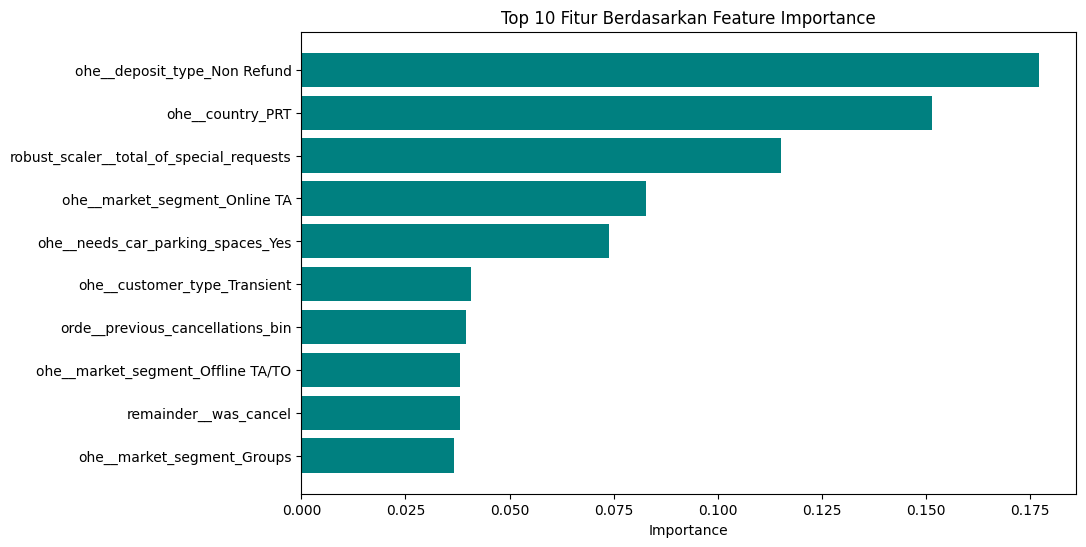

In [59]:
# Visualisasi dengan bar chart
plt.figure(figsize=(10, 6))
plt.barh(top10_features['Feature'], top10_features['Importance'], color='teal')
plt.xlabel('Importance')
plt.title('Top 10 Fitur Berdasarkan Feature Importance')
plt.gca().invert_yaxis()  # Agar fitur dengan importance tertinggi ada di atas
plt.show()

Bar chart di atas adalah 10 fitur terpenting dari total 50 fitur berdasarkan model yang kami pilih. Perlu dicatat bahwa kita hanya dapat melihat seberapa besar bobot masing-masing fitur tanpa mengetahui arah pengaruhnya terhadap pembatalan booking.



### Penggunaan model dengan tabel probabilitas

Dengan machine learning kita bisa memprediksi dan mengelompokkan tamu berisiko, dari sini kita bisa melakukan follow up sesuai probabiltas ataupun kategori risiko 

In [74]:
# Dapatkan probabilitas prediksi
y_pred_proba = best_model.predict_proba(X_test)

# Ubah ke persentase (dikali 100) dan bulatkan ke 2 desimal
proba_percent = (y_pred_proba * 100).round(2)

# Konversi ke DataFrame dengan nama kolom sesuai kelas
proba_df = pd.DataFrame(proba_percent, columns=[f"Prob_{cls} (%)" for cls in best_model.named_steps['rf'].classes_])

# Tambahkan kolom prediksi dan label asli
proba_df['Predicted'] = best_model.predict(X_test)
proba_df['True'] = y_test.reset_index(drop=True)

# Lihat hasil
proba_df.head()


,Prob_0 (%),Prob_1 (%),Predicted,True
0,99.13,0.87,0,0
1,77.30,22.70,0,1
2,5.51,94.49,1,1
3,98.38,1.62,0,0
4,99.04,0.96,0,0


In [65]:
# Dapatkan probabilitas prediksi
y_pred_proba = best_model.predict_proba(X_test)

# Ubah ke persentase (dikali 100) dan bulatkan ke 2 desimal
proba_percent = (y_pred_proba * 100).round(2)

# Konversi ke DataFrame dengan nama kolom sesuai kelas
proba_df = pd.DataFrame(proba_percent, columns=[f"Prob_{cls} (%)" for cls in best_model.named_steps['rf'].classes_])
proba_df.head()


,Prob_0 (%),Prob_1 (%)
0,99.13,0.87
1,77.30,22.70
2,5.51,94.49
3,98.38,1.62
4,99.04,0.96


#### Binning risiko pembatalan booking calon tamu berdasarkan probabilitas

In [66]:
bins = [0, 40, 50, 70, 90, 100] # Optional tergantung kebutuhan hotel
labels = ['Sangat Rendah', 'Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi']
proba_df['Risk_Level'] = pd.cut(proba_df['Prob_1 (%)'], bins=bins, labels=labels, right=False)


#### Follow-up yang dilakukan tergantung level risiko batal

In [67]:
proba_df['Action'] = proba_df['Risk_Level'].map({
    'Sangat Rendah': 'Tidak perlu follow-up',
    'Rendah': 'Pantau lebih lanjut',
    'Sedang': 'Tawarkan engagement', # no cost engagement
    'Tinggi': 'Tawarkan insentif', # costly engagemnt
    'Sangat Tinggi': 'Kontak manual'
})


#### *Perlu digarisbawahi bahwa ini hanyalah contoh tindakan dengan pendekatan sederhana berdasarkan level risiko. Diperlukan analisis data calon tamu yang lebih mendalam untuk mencapai efisiensi dan optimalisasi sumber daya.

In [68]:
proba_df.sample(15)

,Prob_0 (%),Prob_1 (%),Risk_Level,Action
14970,14.31,85.69,Tinggi,Tawarkan insentif
15366,23.75,76.25,Tinggi,Tawarkan insentif
1538,63.12,36.88,Sangat Rendah,Tidak perlu follow-up
6835,28.40,71.60,Tinggi,Tawarkan insentif
357,97.78,2.22,Sangat Rendah,Tidak perlu follow-up
11461,37.59,62.41,Sedang,Tawarkan engagement
6801,0.24,99.76,Sangat Tinggi,Kontak manual
16260,77.84,22.16,Sangat Rendah,Tidak perlu follow-up
4365,99.69,0.31,Sangat Rendah,Tidak perlu follow-up
14565,34.37,65.63,Sedang,Tawarkan engagement


### Simulasi perhitungan kerugian dengan dan tanpa machine learning

Dataset ini tidak menyediakan informasi keuangan, sehingga kami menggunakan asumsi untuk memperkirakan dampak bisnis. Rata-rata margin bersih yang diperoleh hotel dari satu pemesanan adalah sekitar Rp250.000. Oleh karena itu, setiap pembatalan reservasi dari tamu berpotensi menyebabkan kerugian pendapatan (potential revenue loss) sebesar Rp250.000.

Tanpa bantuan model machine learning, hotel tidak dapat mengidentifikasi atau melakukan intervensi terhadap tamu yang kemungkinan akan membatalkan. Namun, dengan penerapan prediksi melalui machine learning, hotel dapat mengambil tindakan preventif seperti menawarkan promosi atau insentif kepada tamu yang diprediksi akan membatalkan.

Model dengan metrik recall yang tinggi cenderung lebih sensitif terhadap pembatalan, tetapi berisiko menghasilkan false positive — yaitu memprediksi bahwa seorang tamu akan membatalkan padahal sebenarnya tidak. Dalam kasus ini, hotel tetap melakukan intervensi yang sebenarnya tidak dibutuhkan, seperti memberikan diskon atau promosi. Akibatnya, hotel menanggung kerugian berupa pengeluaran yang tidak perlu (unnecessary expenditure), yang kami asumsikan sebesar Rp100.000 per kasus.

Berikut adalah perhitungan kasarnya

**False positive**  
Diprediksi akan melakukan pembatalan, sebenarnya tidak

In [85]:
df_fp = proba_df[(proba_df["Predicted"] == 1) & (proba_df["True"] == 0)]

**False negative**  
Diprediksi tidak akan melakukan pembatalan, sebenarnya akan melakukan pembatalan

In [86]:
df_fn = proba_df[(proba_df["Predicted"] == 0) & (proba_df["True"] == 1)]

**True positive**  
Diprediksi akan melakukan pembatalan, dan memang akan melakukan pembatalan


In [87]:
df_tp = proba_df[(proba_df["Predicted"] == 1) & (proba_df["True"] == 1)]

In [84]:
# Asumsi margin dan biaya marketing
margin_per_kamar = 250_000  # Margin per kamar
biaya_marketing_fp = 100_000  # Biaya marketing untuk FP (salah prediksi batal)

# Hitung jumlah FP dan FN
n_fp = len(df_fp)
n_fn = len(df_fn)
n_ap = len(proba_df[(proba_df["True"] == 1)])  # Jumlah yang memang batal berdasarkan data historis


# Total kerugian dari FP, FN dan AP(actual positive, berdasarkan data historis)
fp_loss = n_fp * biaya_marketing_fp
fn_loss = n_fn * margin_per_kamar
ap_loss = n_ap * margin_per_kamar  # Kerugian karena pembatalan

# Tampilkan total kerugian
print(f"Total kerugian fp: Rp{fp_loss:,.0f}")
print(f"Total kerugian fn: Rp{fn_loss:,.0f}")
print(f"Estimasi total kerugian dengan menerapkan machine learning, maksimal: Rp{fn_loss + fp_loss:,.0f}")
print(f"Total kerugian tanpa machine learning: Rp{ap_loss:,.0f}")
print(f"Estimasi total kerugian yang bisa ditekan dengan menerapkan machine learning, maksimal: Rp{ap_loss - (fn_loss + fp_loss):,.0f}")


Total kerugian fp: Rp191,800,000
Total kerugian fn: Rp360,500,000
Estimasi total kerugian dengan menerapkan machine learning, maksimal: Rp552,300,000
Total kerugian tanpa machine learning: Rp1,539,000,000
Estimasi total kerugian yang bisa ditekan dengan menerapkan machine learning, maksimal: Rp986,700,000


>## Kesimpulan dan Rekomendasi

### Rekomendasi Data

* Dataset kekurangan kolom-kolom yang berpotensi menjadi fitur prediktif yang baik untuk memodelkan pembatalan, seperti nominal deposit, tanggal booking, serta tanggal menginap yang dipesan.
* Kolom `reserved_room_type` tidak diketahui detail spesifikasinya, bila lebih detail ini bisa memberikan insight tambahan dan kemudahan interpretasi
* Penggabungan data kategorikal dengan label 'Other' untuk kategori yang jarang (rare category) bertujuan untuk mencegah masalah seperti pada `market_segment` dengan nilai 'Undefined' yang hanya muncul satu kali, serta untuk mempermudah proses pelatihan model.  


### Rekomendasi Bisnis

Divisi Finance  
* Penyesuaian biaya marketing khususnya yang ditargetkan kepada calon tamu dapat dilakukan secara fleksibel mengikuti kondisi keuangan hotel, musim (high season atau low season), serta karakteristik tamu, seperti segmentasi pasar dan riwayat pemesanan, tentunya untuk menerapkan ini perlu penerapan rekomendasi data sebelumnya.

Divisi Marketing  
* Dalam situasi overbooking, calon tamu dengan risiko pembatalan yang tinggi dapat diberikan penawaran untuk reschedule disertai dengan benefit tertentu. Strategi ini memungkinkan hotel untuk tetap menerima tamu lain dengan risiko pembatalan rendah, sehingga mengurangi potensi kerugian. 
 
Divisi Operasional   
* Calon tamu yang melakukan pemesanan melalui OTA (Online Travel Agent) cenderung memiliki tingkat pembatalan yang lebih tinggi. Berdasarkan informasi ini, hotel dapat memprioritaskan tamu dari saluran pemesanan lain yang lebih andal, seperti pemesanan langsung atau melalui agen resmi, untuk meminimalkan risiko pembatalan dan menjaga tingkat okupansi.
* Menyesuaikan alokasi kamar sesuai dengan tingkat probabilitas pembatalan, penerapannya sebaiknya berkoordinasi dengan divisi marketing dan divisi lain yang bersinggungan.  


### Rekomendasi Machine Learning

* Interpretasi dengan shaply
* Uji coba dengan resampling

### Kesimpulan

Dengan bantuan machine learning, hotel dapat menekan potensi kerugian yang timbul akibat pembatalan reservasi. Penting untuk dicatat bahwa machine learning tidak secara langsung menurunkan tingkat pembatalan, melainkan berperan sebagai alat prediksi untuk mengidentifikasi tamu yang berisiko tinggi melakukan pembatalan.

Efektivitas model ini sangat bergantung pada tindakan lanjutan (follow-up actions) yang dilakukan oleh manajemen hotel. Misalnya, memberikan promosi, reminder, atau insentif kepada tamu yang diprediksi akan membatalkan dapat membantu meningkatkan retensi dan mengurangi pembatalan aktual.

Dengan kata lain, model hanya memberi peringatan dini (early warning system) — dampak nyata baru akan terasa apabila hasil prediksi tersebut digunakan secara proaktif dalam strategi operasional hotel.


### *Catatan Tambahan

Karena keterbatasan waktu, fallback handling pada model ini belum diterapkan secara optimal, khususnya pada fitur-fitur kategorikal. Salah satu contohnya adalah kolom `market_segment` yang mengandung nilai 'Undefined'. Ketika dilakukan model inference, model tidak mampu mengenali nilai tersebut sebagai 'Other' atau sebagai nilai baru yang tidak pernah muncul pada data pelatihan.

Akibatnya, untuk sementara ini, petugas entri data belum dapat memasukkan nilai di luar kategori yang telah dikenal (seperti Other) pada kolom `market_segment`, `customer_type`, dan `deposit_type`. Hal ini dapat menyebabkan error atau hasil prediksi yang tidak akurat sampai fallback handling terhadap nilai-nilai tak dikenal diterapkan dengan baik.
